In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def sgn(w, x):
  return np.sign(np.dot(w.T, x))

def perceptron(X, y, w_init, it=100):
  w = [w_init]
  i = 1
  while True: 
    pred =  sgn(w[-1], X).reshape(-1)
    pred[pred >= 0] = 1
    pred[pred < 0 ] = 0 

    # Get the id's point in convergence set
    mis_id = np.where(np.equal(pred, y) == False)[0]
    num_mis = mis_id.shape[0]
    if (num_mis == 0) or (i == it):
      return w, mis_id.size, i

    # Update weight
    random_id = np.random.choice(mis_id, 1)[0]
    w_t = w[-1] + (2 * y[random_id] - 1) * X[:, random_id].reshape(X_bar.shape[0], -1)   # size(w) = 3x1, size(X[:,0]) = (3,)
    w.append(w_t)

    i += 1

Linear Separable

In [ ]:
means = [[1, 2], [3, 4]]
cov = [[0.5, 0], [0, 0.5]]
N = 40

X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.array([0]*N + [1]*N)

# Xbar 
X_bar = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

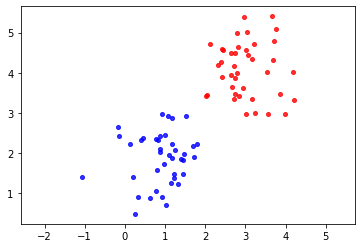

In [ ]:
#Plot 
X0 = X[:, y == 0]
X1 = X[:, y == 1]
plt.plot(X0[0, :], X0[1, :], 'bo', markersize = 4, alpha = .8) 
plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 4, alpha = .8)

plt.axis('equal')
plt.plot()
plt.show()

In [ ]:
w_init = np.random.randn(X_bar.shape[0], 1)

w, mis_id, it = perceptron(X_bar, y, w_init)
print(w[-1].T)
print('Missing point: ', mis_id, ', it: ', it)

[[-4.90330842  0.72136712  1.04372382]]
Missing point:  0 , it:  16


In [ ]:
def history(X, y, w, it):
  
  #for i in range(it):

  w_0 = w[-1][0]
  w_1 = w[-1][1]
  w_2 = w[-1][2]
   
  #plt.subplot(2, 3, i+1)
   
  x_0 = np.linspace(X[0].min(), X[0].max(), 2)
  # Line w0+x*w1+y*w2=0
  y_0 = -(w_1*x_0+w_0)/w_2
  plt.plot(x_0, y_0, '-b', markersize = 4)
   
  X0 = X[:, y == 0]
  X1 = X[:, y == 1]
  plt.plot(X0[0, :], X0[1, :], 'bo', markersize = 4, alpha = .8)
  plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 4, alpha = .8)
   
  #plt.xlabel('it:'+ str(i))

  plt.tight_layout()
  plt.plot()
  plt.show()

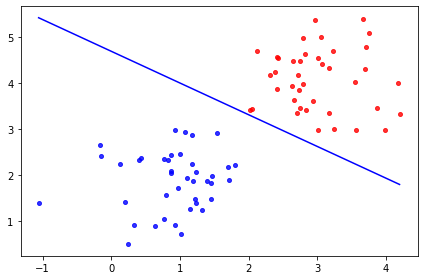

In [ ]:
history(X, y, w, it)

Nonlinear Separable

In [ ]:
means = [[1, 2], [3, 3]]
cov = [[0.8, 0], [0, 0.5]]
N = 40

X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.array([0]*N + [1]*N)

# Xbar 
X_bar = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

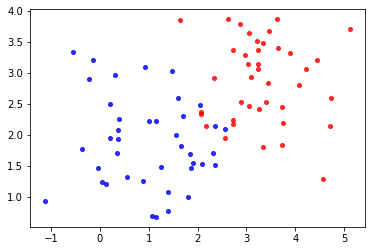

In [ ]:
#Plot 
X0 = X[:, y == 0]
X1 = X[:, y == 1]
plt.plot(X0[0, :], X0[1, :], 'bo', markersize = 4, alpha = .8) 
plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 4, alpha = .8)

plt.plot()
plt.show()

In [ ]:
w_init = np.random.randn(X_bar.shape[0], 1)

w, mis_id, it = perceptron(X_bar, y, w_init, it=1000)
print(w[-1].T)
print('Missing point: ', mis_id, 'it: ', it)

[[-55.19511222  10.89403608   9.44062013]]
Missing point:  9 it:  1000


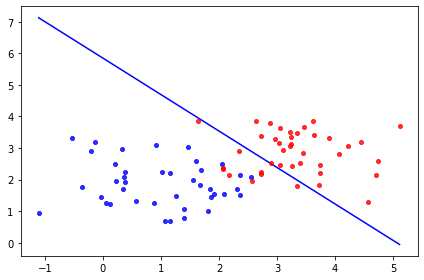

In [ ]:
history(X, y, w, it)

Iris flower

In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Machine Learning/Perceptron/Iris.csv'

data = pd.read_csv(path)
print(data)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [ ]:
# Iris-setosa data
X0 = data.iloc[0:50, 1:5].to_numpy().T
# Iris-virginica data
X1 = data.iloc[100:150, 1:5].to_numpy().T

X = np.concatenate((X0, X1), axis = 1)

# Xbar 
X_bar = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

# Iris-virginica lable 1, Iris-setosa lable 0
y = np.array([0]*X0.shape[1] + [1]*X1.shape[1])

In [ ]:
w_init = np.random.randn(X_bar.shape[0], 1)

w, mis_id, it = perceptron(X_bar, y, w_init)
print(w[-1].T)
print('Missing point: ', mis_id , ', it: ', it)

[[-0.14805776 -1.6782871  -5.42808048  6.34072475  4.107025  ]]
Missing point:  0 , it:  6
